In [12]:
# Data Preprocessing (Objective 1)
# Load the dataset
import pandas as pd

# Load your data (adjust the path for your dataset in Colab)
df = pd.read_excel('/content/IoT Agriculture 2024(1).xlsx')

# Display the first few rows of the dataset
df.head()

# Handling missing values (if any)
df = df.dropna()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Encoding categorical columns (if needed, for instance, one-hot encoding)
df = pd.get_dummies(df, columns=['Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF', 'Watering_plant_pump_ON', 'Water_pump_actuator_OFF', 'Water_pump_actuator_ON'], drop_first=True)

# Feature engineering: Select relevant features
features = ['temperature', 'humidity', 'water_level', 'N', 'P', 'K']
target = 'temperature'  # Example target for prediction

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train, X_test, y_train, y_test)

       temperature  humidity  water_level    N    P    K
0               41        63          100  255  255  255
1               41        59          100  255  255  255
2               41        62          100  255  255  255
3               40        60          100  255  255  255
4               39        61          100  255  255  255
...            ...       ...          ...  ...  ...  ...
30333           12        65          100  178  186  157
30334           12        64          100  178  186  157
30335           12        62          100  178  186  157
30336           12        65          100  178  186  157
30337           12        64          100  178  186  157

[30336 rows x 6 columns]        temperature  humidity  water_level    N    P    K
30338           12        62          100  178  186  157
30339           12        62          100  178  186  157
30340           12        60          100  178  186  157
30341           12        51          100  178  186  157
30342

In [11]:
# LSTM Model for Time Series Prediction (Objective 2)
# LSTM Model to predict temperature or other variables
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Prepare data for LSTM model (reshape data for time series)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
print(model)
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Predict and evaluate
y_pred = model.predict(X_test_reshaped)
print(y_pred)
# Evaluate model performance
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

<Sequential name=sequential_1, built=False>
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


948/948 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 13.5117 - val_loss: 1.7829
Epoch 2/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1937 - val_loss: 1.1947
Epoch 3/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1454 - val_loss: 1.4100
Epoch 4/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1162 - val_loss: 0.4443
Epoch 5/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1220 - val_loss: 0.5538
Epoch 6/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0816 - val_loss: 0.3764
Epoch 7/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0701 - val_loss: 0.4015
Epoch 8/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0437 - val_loss: 0.1921
Epoch 9/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0373 - val_loss: 0.3081
Epoch 10/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0292 - val_loss: 0.1738
Epoch 11/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0243 - val_loss: 0.0977
Epoch 12/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0

In [10]:
# Linear Regression for Comparison (Objective 2)
# Linear Regression Model for comparison
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
lr_model = LinearRegression()
print(lr_model)
lr_model.fit(X_train, y_train)
# Make predictions
y_lr_pred = lr_model.predict(X_test)
print(y_lr_pred)
# Evaluate linear regression performance
lr_mae = mean_absolute_error(y_test, y_lr_pred)
print(f"Linear Regression Mean Absolute Error: {lr_mae}")

LinearRegression()
[12. 12. 12. ...  3.  3.  3.]
Linear Regression Mean Absolute Error: 5.877506638909571e-15


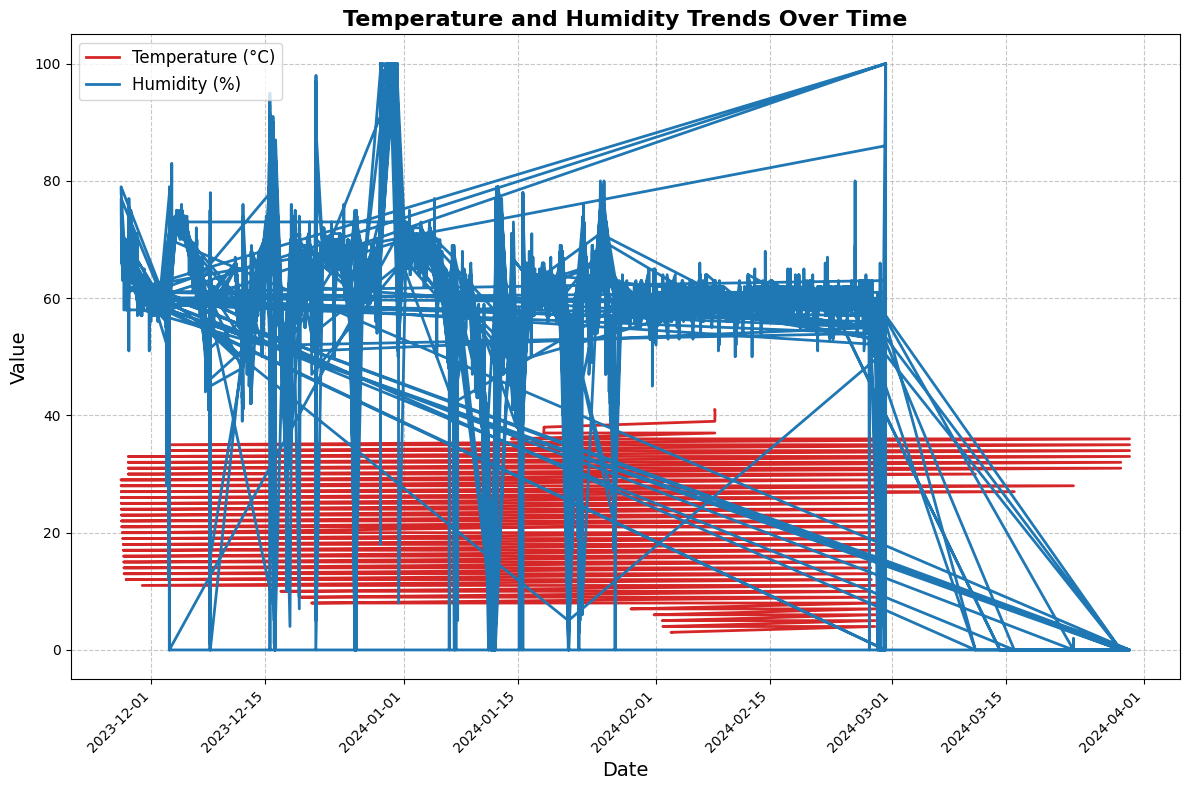

In [9]:
# Data Visualization (Objective 1)
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plot temperature and humidity data
plt.plot(df['date'], df['temperature'], label='Temperature (°C)', color='tab:red', linewidth=2)
plt.plot(df['date'], df['humidity'], label='Humidity (%)', color='tab:blue', linewidth=2)

# Customize the plot with labels, title, and grid
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Temperature and Humidity Trends Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend to differentiate between the two lines
plt.legend(loc='upper left', fontsize=12)

# Add gridlines to make it easier to read values
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
# Evaluation of Cost Reduction, Sustainability, and Compliance (Objective 3)
# Measure the impact of predictions on sustainability metrics, cost reduction
# Assuming you have a function to calculate emissions or cost

# Calculate the predicted emissions reduction based on optimized supply chain
predicted_cost_savings = np.sum(y_pred) - np.sum(y_lr_pred)

print(f"Predicted Cost Savings: {predicted_cost_savings}")

Predicted Cost Savings: 3479.1953125000437
